In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets
boston = datasets.load_boston()
features = pd.DataFrame(boston.data, columns=boston.feature_names)
targets = boston.target

In [63]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, train_size=0.8, random_state=43)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
features_scaled = min_max_scaler.fit_transform(features)
features_scaled = pd.DataFrame(features_scaled)
targets = targets.reshape(506,1)

E:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [64]:
X =features_scaled
y = targets

In [65]:
lm = LinearRegression()
lm.fit(X_train,y_train)
lm.predict(X_train)
lm.predict(X_test)
lm.score(X_test, y_test)

0.76109843618829232

In [77]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=43)
rf.fit(X_train, y_train)
rf.predict(X_train)
rf.predict(X_test)
rf.score(X_test, y_test)

E:\anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.88550163052207997

In [87]:
Column_Name = list(range(X_train.shape[1]))
Column_Importance_Data = pd.DataFrame({'Column_Number':features.columns.values,'Importance':rf.feature_importances_}) 
Column_Importance_Data.sort_values(['Importance'],ascending=False)

,Column_Number,Importance
5,RM,0.491342
12,LSTAT,0.314315
7,DIS,0.065126
0,CRIM,0.037699
4,NOX,0.022565
9,TAX,0.015970
10,PTRATIO,0.013870
11,B,0.012799
6,AGE,0.012324
2,INDUS,0.007258


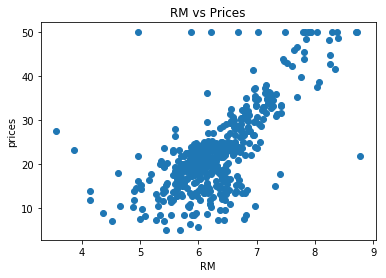

In [101]:
plt.plot(features['RM'], y, 'o')
plt.title("RM vs Prices")
plt.xlabel('RM')
plt.ylabel('prices')
plt.show()